In [1]:
%pip install --upgrade pip

In [2]:
#check if seaborn is installed

import subprocess

try:
    subprocess.check_call(['pip', 'show', 'seaborn'])
except subprocess.CalledProcessError:
    # Seaborn is not installed
    %pip install seaborn
else:
    print('Seaborn is already installed.')

Seaborn is already installed.


In [3]:
#check if plotly is installed

import subprocess

try:
    subprocess.check_call(['pip', 'show', 'plotly'])
except subprocess.CalledProcessError:
    # plotly is not installed
    %pip install plotly
else:
    print('plotly is already installed.')



plotly is already installed.


In [4]:
#check if xgboost is installed

import subprocess

try:
    subprocess.check_call(['pip', 'show', 'xgboost'])
except subprocess.CalledProcessError:
    # xgboost is not installed
    %pip install xgboost
else:
    print('xgboost is already installed.')

xgboost is already installed.


In [5]:
# import necessary libraries

import pandas as pd
import numpy as np
import xgboost as xgb


from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder


# Set display options to show all rows and columns
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [6]:
# importing openpyxl module
import openpyxl

# input excel file path
inputExcelFile ="MorpaData.xlsx"

# creating or loading an excel workbook
newWorkbook = openpyxl.load_workbook(inputExcelFile)

# printing all the sheetnames in an excel file using sheetnames attribute
print('The Sheet names of the given excel file: ')

# Getting the sheetnames as a list using the sheetnames attribute
sheetNames=newWorkbook.sheetnames

# Traversing in the sheetNames list
for name in sheetNames:
   print(name)

The Sheet names of the given excel file: 
Üye Listesi
Giriş Logları
Oyun
Konu anlatımı
çalışmalar
Sınav
konu


In [7]:
# get the member data from excel

member_df = pd.read_excel('MorpaData.xlsx',sheet_name='Üye Listesi')
print(member_df.head(10),'\n\n')

print(member_df.info())

# get the unique number of members

print(member_df['Üye'].nunique())

       Üye  Şehir    İlçe       Okul  Sınıf
0  2070306  10826  162678  120166963      4
1  2910824  16378  624995  813905547      6
2  3045726  10989  721319  231052437      4
3  3661377  10185  376777  733057858      8
4  3794510  11631  709268   72006202      4
5  3969040  11631  626646  305454095      5
6  5084112  11631   23819  659915466      8
7  6789503  15012  248394  310622551      3
8  7221591  11631  485022  529623633      3
9  7899454  14951  599378  265076040      8 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Üye     1999 non-null   int64
 1   Şehir   1999 non-null   int64
 2   İlçe    1999 non-null   int64
 3   Okul    1999 non-null   int64
 4   Sınıf   1999 non-null   int64
dtypes: int64(5)
memory usage: 78.2 KB
None
1999


In [8]:
# get the Login logs data from excel

login_df = pd.read_excel('MorpaData.xlsx',sheet_name='Giriş Logları')
login_df['Giriş Zamanı'] = pd.to_datetime(login_df['Giriş Zamanı'], format='%d/%m/%Y %H:%M:%S')
login_df['Çıkış Zamanı'] = pd.to_datetime(login_df['Çıkış Zamanı'], format='%d/%m/%Y %H:%M:%S')
print(login_df.head(10),'\n\n')

print(login_df.info(),'\n\n')


# get the unique number of members on login data
print("unique member count on login data: ",login_df['Üye'].nunique())

   GirişID      Üye            Giriş Zamanı            Çıkış Zamanı  \
0   181915  2070306 2021-09-09 20:54:37.683 2021-09-09 21:46:55.070   
1   128004  2910824 2021-09-07 20:33:32.583 2021-09-07 21:25:53.753   
2   178974  2910824 2021-09-09 20:18:36.960 2021-09-09 20:58:58.370   
3   182887  2910824 2021-09-09 21:10:33.563 2021-09-09 22:04:55.467   
4   238434  2910824 2021-09-12 10:59:55.210 2021-09-12 11:04:15.233   
5   244552  2910824 2021-09-12 12:32:28.067 2021-09-12 13:28:49.353   
6   273273  2910824 2021-09-13 13:25:51.117 2021-09-13 13:58:05.470   
7   273943  2910824 2021-09-13 13:58:05.470 2021-09-13 14:36:48.393   
8   285795  2910824 2021-09-13 18:44:16.997 2021-09-13 19:44:59.743   
9   345946  2910824 2021-09-15 17:06:06.027 2021-09-15 17:51:50.893   

   Süre Dakika  
0           52  
1           52  
2           40  
3           54  
4            5  
5           56  
6           33  
7           38  
8           60  
9           45   


<class 'pandas.core.frame.Da

In [9]:
# get the lecturing logs data from excel

lecturing_df = pd.read_excel('MorpaData.xlsx',sheet_name='Konu anlatımı')
lecturing_df['Giriş Zamanı'] = pd.to_datetime(lecturing_df['Giriş Zamanı'], format='%d/%m/%Y %H:%M:%S')
lecturing_df['Çıkış Zamanı'] = pd.to_datetime(lecturing_df['Çıkış Zamanı'], format='%d/%m/%Y %H:%M:%S')

# calculate the duration of the lecturing

lecturing_df['lec_Süre'] = (lecturing_df['Çıkış Zamanı'] - lecturing_df['Giriş Zamanı']).dt.total_seconds().astype(int)

print(lecturing_df.head(10),'\n\n')

print(lecturing_df.info(),'\n\n')


# get the unique number of members on lecturing data
print("Unique number of users on lecturing: ", lecturing_df['Üye'].nunique())

       Üye  Eğitim Materyali  Eğitim Materyali Türü  Ders   Konu  \
0  2070306      518826088921                      2     2   9864   
1  2070306      608022794749                      2     2   9864   
2  2910824      633794085515                      2     2   8964   
3  2910824      787304215519                      2     9   9535   
4  2910824      137540475371                      2     3   9659   
5  2910824      799934114128                      2    11   4421   
6  2910824      139874336279                      2     1  10002   
7  2910824      884070756143                      2     2   8965   
8  2910824      884070756143                      2     2   8965   
9  2910824      139874336279                      2     1  10002   

   Katılım Oranı  Performans            Giriş Zamanı            Çıkış Zamanı  \
0             75           0 2021-09-09 20:55:06.357 2021-09-09 21:00:04.783   
1            100           0 2021-09-09 21:00:04.797 2021-09-09 21:46:55.070   
2          

In [10]:
# get the member studies data from excel

studies_df = pd.read_excel('MorpaData.xlsx',sheet_name='çalışmalar')
studies_df['Giriş Zamanı'] = pd.to_datetime(studies_df['Giriş Zamanı'], format='%d/%m/%Y %H:%M:%S')
studies_df['Çıkış Zamanı'] = pd.to_datetime(studies_df['Çıkış Zamanı'], format='%d/%m/%Y %H:%M:%S')

studies_df['stud_Süre'] = (studies_df['Çıkış Zamanı'] - studies_df['Giriş Zamanı']).dt.total_seconds().astype(int)

print(studies_df.head(10),'\n\n')

print(studies_df.info(),'\n\n')

# get the unique number of members on studies data
print("unique member count on studies data: ",studies_df['Üye'].nunique())

       Üye  Eğitim Materyali  Eğitim Materyali Türü  Ders   Konu  \
0  2910824      291765069973                      3     2   8964   
1  2910824      383712317425                      3     9   9535   
2  2910824      291765069973                      3     2   8964   
3  2910824      450320146095                      3     3   9659   
4  2910824      460263704270                      3    11   4421   
5  2910824      170232354529                      3     2   8965   
6  2910824      343498413848                      3     1  10002   
7  2910824      924340585642                      3     2   8966   
8  2910824      990590760357                      3     3   9661   
9  2910824       90390416811                      3     2   8971   

   Katılım Oranı  Performans            Giriş Zamanı            Çıkış Zamanı  \
0            100          62 2021-09-07 20:34:09.977 2021-09-07 20:37:27.890   
1            100          90 2021-09-09 21:18:02.070 2021-09-09 22:04:55.470   
2          

In [11]:
# get the member exams data from excel

exams_df = pd.read_excel('MorpaData.xlsx',sheet_name='Sınav')
exams_df['Giriş Zamanı'] = exams_df['Giriş Zamanı'].apply(lambda x: x.strftime("%d/%m/%Y  %H:%M:%S"))
exams_df['Çıkış Zamanı'] = exams_df['Çıkış Zamanı'].apply(lambda x: x.strftime("%d/%m/%Y  %H:%M:%S"))

exams_df['Giriş Zamanı'] = pd.to_datetime(exams_df['Giriş Zamanı'], format='%d/%m/%Y %H:%M:%S')
exams_df['Çıkış Zamanı'] = pd.to_datetime(exams_df['Çıkış Zamanı'], format='%d/%m/%Y %H:%M:%S')

exams_df['Giriş Zamanı']

print(exams_df.head(10),'\n\n')

print(exams_df.info(),'\n\n')

# get the unique number of members on exams data
print("unique member count on exams data: ",exams_df['Üye'].nunique())


# wrong answers are not deducted from the total score.

       Üye         Sınav   Konu  Sınav Türü  Doğru Sayısı  Yanlış Sayısı  \
0  2910824  268222943622   8964           1             8              1   
1  2910824  501151045356   9535           1             9              0   
2  2910824  934072969211   9659           1             8              2   
3  2910824  934072969211   9659           1             9              1   
4  2910824     438484723   4421           1             4              6   
5  2910824  523324425042   8965           1             0              8   
6  2910824  182157124583  10002           1             0              0   
7  2910824  182157124583  10002           1             5              5   
8  2910824  636098373206   8971           1             9              0   
9  2910824  808509304221   9662           1             3              6   

   Boş Sayısı  Puan        Giriş Zamanı        Çıkış Zamanı  Süre  GirişLog  
0           1    80 2021-09-07 20:40:54 2021-09-07 20:45:06   237    128004  
1      

In [12]:
# get the member subject data from excel

subject_df = pd.read_excel('MorpaData.xlsx',sheet_name='konu')
subject_df.head(10)

#sort according to aktif materyal sayısı

subject_df.sort_values(by=['Aktif Materyal Sayısı'],ascending=False)



,Sınıf,Ders,Konu,Aktif Materyal Sayısı,Toplam Materyal Sayısı
4499,25,2,899,58,58
4110,22,1,7699,42,49
5324,36,3,6749,39,39
3916,20,3,2192,38,39
4728,27,3,4338,37,37
...,...,...,...,...,...
4794,28,2,4585,0,1
4795,28,2,4586,0,1
4796,28,2,4587,0,1
872,4,2,9870,0,3


In [13]:
#left join the exam and subject dataframes

exam_subject_df = pd.merge(exams_df,subject_df,how='left',left_on='Konu',right_on='Konu')

# change column names for further join operations
exam_subject_df.rename(
    columns={"Giriş Zamanı": "S_Giriş Zamanı", "Çıkış Zamanı": "S_Çıkış Zamanı", "Süre":"S_süre"},
    inplace=True,
)


In [14]:
# drop non-numeric sınıf rows

exam_subject_df = exam_subject_df[exam_subject_df['Sınıf'].notna()]

exam_subject_df

,Üye,Sınav,Konu,Sınav Türü,Doğru Sayısı,Yanlış Sayısı,Boş Sayısı,Puan,S_Giriş Zamanı,S_Çıkış Zamanı,S_süre,GirişLog,Sınıf,Ders,Aktif Materyal Sayısı,Toplam Materyal Sayısı
0,2910824,268222943622,8964,1,8,1,1,80,2021-09-07 20:40:54,2021-09-07 20:45:06,237,128004,6.0,2.0,6.0,6.0
1,2910824,501151045356,9535,1,9,0,1,90,2021-09-09 21:20:08,2021-09-09 21:24:25,241,182887,6.0,9.0,6.0,6.0
2,2910824,934072969211,9659,1,8,2,0,80,2021-09-12 11:03:55,2021-09-12 12:48:24,149,238434,6.0,3.0,6.0,6.0
3,2910824,934072969211,9659,1,9,1,0,90,2021-09-13 14:03:34,2021-09-13 14:14:50,659,273943,6.0,3.0,6.0,6.0
4,2910824,438484723,4421,1,4,6,0,40,2021-09-13 18:53:41,2021-10-07 19:32:12,115,285795,6.0,11.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8308,2428472503,45103129645,8271,1,4,1,0,80,2021-09-29 07:09:59,2021-09-29 07:14:40,254,827926,2.0,4.0,6.0,7.0
8309,2428472503,45103129645,8271,1,5,0,0,100,2021-09-29 07:14:31,2021-09-29 07:15:17,19,827926,2.0,4.0,6.0,7.0
8310,2428472503,590286074810,9839,1,5,0,0,100,2021-09-29 07:15:10,2021-09-29 07:20:16,143,827926,2.0,4.0,6.0,6.0
8311,2428472503,120928860188,8892,1,10,0,0,100,2021-09-29 18:55:21,2021-09-29 18:56:32,45,850540,2.0,2.0,6.0,6.0


In [15]:
exam_subject_df['Sınıf'] = exam_subject_df['Sınıf'].astype('int64')
exam_subject_df['Ders'] = exam_subject_df['Ders'].astype('int64')
exam_subject_df['Aktif Materyal Sayısı'] = exam_subject_df['Aktif Materyal Sayısı'].astype('int64')
exam_subject_df['Toplam Materyal Sayısı'] = exam_subject_df['Toplam Materyal Sayısı'].astype('int64')

exam_subject_df.head(10)

,Üye,Sınav,Konu,Sınav Türü,Doğru Sayısı,Yanlış Sayısı,Boş Sayısı,Puan,S_Giriş Zamanı,S_Çıkış Zamanı,S_süre,GirişLog,Sınıf,Ders,Aktif Materyal Sayısı,Toplam Materyal Sayısı
0,2910824,268222943622,8964,1,8,1,1,80,2021-09-07 20:40:54,2021-09-07 20:45:06,237,128004,6,2,6,6
1,2910824,501151045356,9535,1,9,0,1,90,2021-09-09 21:20:08,2021-09-09 21:24:25,241,182887,6,9,6,6
2,2910824,934072969211,9659,1,8,2,0,80,2021-09-12 11:03:55,2021-09-12 12:48:24,149,238434,6,3,6,6
3,2910824,934072969211,9659,1,9,1,0,90,2021-09-13 14:03:34,2021-09-13 14:14:50,659,273943,6,3,6,6
4,2910824,438484723,4421,1,4,6,0,40,2021-09-13 18:53:41,2021-10-07 19:32:12,115,285795,6,11,5,7
5,2910824,523324425042,8965,1,0,8,2,0,2021-09-15 18:09:04,2021-09-15 18:17:35,492,349321,6,2,6,6
6,2910824,182157124583,10002,1,0,0,10,0,2021-09-17 18:27:05,2021-09-17 18:27:30,5,414086,6,1,3,3
7,2910824,182157124583,10002,1,5,5,0,50,2021-09-17 18:27:23,2021-09-17 18:28:56,73,414086,6,1,3,3
8,2910824,636098373206,8971,1,9,0,1,90,2021-09-22 20:45:43,2021-09-28 19:29:37,588,598986,6,2,6,6
9,2910824,808509304221,9662,1,3,6,1,30,2021-09-23 20:31:26,2021-09-23 20:34:46,176,639881,6,3,7,7


In [16]:
# add cumulative lecture time to exam_subject dataframe for each member according to the subject prior to exam date s_Giriş Zamanı

# calculate cumulative lecture time before the exam date for each member of each subject
exam_subject_df['cum_lecture_time'] = 0
for index, row in exam_subject_df.iterrows():
    df = lecturing_df[lecturing_df['Üye'] == row['Üye']]
    df = df[df['Konu'] == row['Konu']]
    df = df[df['Giriş Zamanı'] < row['S_Giriş Zamanı']]
    df['lec_Süre'] = df['lec_Süre'].astype('int64')
    exam_subject_df.at[index,'cum_lecture_time'] = df['lec_Süre'].sum()

# calculate cumulative study time before the exam date for each member of each subject
exam_subject_df['cum_study_time'] = 0
for index, row in exam_subject_df.iterrows():
    df = studies_df[studies_df['Üye'] == row['Üye']]
    df = df[df['Konu'] == row['Konu']]
    df = df[df['Giriş Zamanı'] < row['S_Giriş Zamanı']]
    df['stud_Süre'] = df['stud_Süre'].astype('int64')
    exam_subject_df.at[index,'cum_study_time'] = df['stud_Süre'].sum()

exam_subject_df['total_study_time'] = exam_subject_df['cum_lecture_time'] + exam_subject_df['cum_study_time']
        
exam_subject_df



,Üye,Sınav,Konu,Sınav Türü,Doğru Sayısı,Yanlış Sayısı,Boş Sayısı,Puan,S_Giriş Zamanı,S_Çıkış Zamanı,S_süre,GirişLog,Sınıf,Ders,Aktif Materyal Sayısı,Toplam Materyal Sayısı,cum_lecture_time,cum_study_time,total_study_time
0,2910824,268222943622,8964,1,8,1,1,80,2021-09-07 20:40:54,2021-09-07 20:45:06,237,128004,6,2,6,6,2905,197,3102
1,2910824,501151045356,9535,1,9,0,1,90,2021-09-09 21:20:08,2021-09-09 21:24:25,241,182887,6,9,6,6,432,2813,3245
2,2910824,934072969211,9659,1,8,2,0,80,2021-09-12 11:03:55,2021-09-12 12:48:24,149,238434,6,3,6,6,0,0,0
3,2910824,934072969211,9659,1,9,1,0,90,2021-09-13 14:03:34,2021-09-13 14:14:50,659,273943,6,3,6,6,591,2774,3365
4,2910824,438484723,4421,1,4,6,0,40,2021-09-13 18:53:41,2021-10-07 19:32:12,115,285795,6,11,5,7,438,3134,3572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8308,2428472503,45103129645,8271,1,4,1,0,80,2021-09-29 07:09:59,2021-09-29 07:14:40,254,827926,2,4,6,7,0,0,0
8309,2428472503,45103129645,8271,1,5,0,0,100,2021-09-29 07:14:31,2021-09-29 07:15:17,19,827926,2,4,6,7,0,0,0
8310,2428472503,590286074810,9839,1,5,0,0,100,2021-09-29 07:15:10,2021-09-29 07:20:16,143,827926,2,4,6,6,0,0,0
8311,2428472503,120928860188,8892,1,10,0,0,100,2021-09-29 18:55:21,2021-09-29 18:56:32,45,850540,2,2,6,6,0,0,0


In [17]:
# to tag the members who attempt gaming the system, I crate a deep copy of exams_df to exams_df_gtsLabeled.

exams_df_gtsLabeled = exam_subject_df.copy(deep=True)

# create a new column for labeling and overlapping time

exams_df_gtsLabeled['Label'] = ""
exams_df_gtsLabeled['Overlap (secs.)'] = ""

# update the index of exams_df_gtsLabeled

exams_df_gtsLabeled.reset_index(drop=True, inplace=True)

# then we write the conditions for labeling the data who "Gaming the System". 1 for gaming, 0 for not gaming.

for i in range(1,len(exams_df_gtsLabeled)):
    if exams_df_gtsLabeled['Üye'][i-1] == exams_df_gtsLabeled['Üye'][i]:
        if exams_df_gtsLabeled['Sınav'][i-1] == exams_df_gtsLabeled['Sınav'][i]:
            if exams_df_gtsLabeled['Konu'][i-1] == exams_df_gtsLabeled['Konu'][i]:
                if (exams_df_gtsLabeled['S_Çıkış Zamanı'][i-1] > exams_df_gtsLabeled['S_Giriş Zamanı'][i]) and (exams_df_gtsLabeled['Puan'][i-1] < exams_df_gtsLabeled['Puan'][i]) and (exams_df_gtsLabeled['GirişLog'][i-1] == exams_df_gtsLabeled['GirişLog'][i]):
                    exams_df_gtsLabeled['Label'][i] = 1
                    exams_df_gtsLabeled['Overlap (secs.)'][i] = (exams_df_gtsLabeled['S_Giriş Zamanı'][i] - exams_df_gtsLabeled['S_Çıkış Zamanı'][i-1]).total_seconds() * -1  # this is the overlapping time in seconds 

exams_df_gtsLabeled

C:\Users\melih\AppData\Local\Temp\ipykernel_4492\2612624138.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exams_df_gtsLabeled['Label'][i] = 1
C:\Users\melih\AppData\Local\Temp\ipykernel_4492\2612624138.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exams_df_gtsLabeled['Overlap (secs.)'][i] = (exams_df_gtsLabeled['S_Giriş Zamanı'][i] - exams_df_gtsLabeled['S_Çıkış Zamanı'][i-1]).total_seconds() * -1  # this is the overlapping time in seconds


,Üye,Sınav,Konu,Sınav Türü,Doğru Sayısı,Yanlış Sayısı,Boş Sayısı,Puan,S_Giriş Zamanı,S_Çıkış Zamanı,S_süre,GirişLog,Sınıf,Ders,Aktif Materyal Sayısı,Toplam Materyal Sayısı,cum_lecture_time,cum_study_time,total_study_time,Label,Overlap (secs.)
0,2910824,268222943622,8964,1,8,1,1,80,2021-09-07 20:40:54,2021-09-07 20:45:06,237,128004,6,2,6,6,2905,197,3102,,
1,2910824,501151045356,9535,1,9,0,1,90,2021-09-09 21:20:08,2021-09-09 21:24:25,241,182887,6,9,6,6,432,2813,3245,,
2,2910824,934072969211,9659,1,8,2,0,80,2021-09-12 11:03:55,2021-09-12 12:48:24,149,238434,6,3,6,6,0,0,0,,
3,2910824,934072969211,9659,1,9,1,0,90,2021-09-13 14:03:34,2021-09-13 14:14:50,659,273943,6,3,6,6,591,2774,3365,,
4,2910824,438484723,4421,1,4,6,0,40,2021-09-13 18:53:41,2021-10-07 19:32:12,115,285795,6,11,5,7,438,3134,3572,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7873,2428472503,45103129645,8271,1,4,1,0,80,2021-09-29 07:09:59,2021-09-29 07:14:40,254,827926,2,4,6,7,0,0,0,,
7874,2428472503,45103129645,8271,1,5,0,0,100,2021-09-29 07:14:31,2021-09-29 07:15:17,19,827926,2,4,6,7,0,0,0,1,9.0
7875,2428472503,590286074810,9839,1,5,0,0,100,2021-09-29 07:15:10,2021-09-29 07:20:16,143,827926,2,4,6,6,0,0,0,,
7876,2428472503,120928860188,8892,1,10,0,0,100,2021-09-29 18:55:21,2021-09-29 18:56:32,45,850540,2,2,6,6,0,0,0,,


In [18]:
#Sort the tagged data according to the member and subject

exams_df_gtsLabeled.sort_values(by=['Konu','Üye'])

# name the table as df for the sake of simplicity

df = exams_df_gtsLabeled

df

,Üye,Sınav,Konu,Sınav Türü,Doğru Sayısı,Yanlış Sayısı,Boş Sayısı,Puan,S_Giriş Zamanı,S_Çıkış Zamanı,S_süre,GirişLog,Sınıf,Ders,Aktif Materyal Sayısı,Toplam Materyal Sayısı,cum_lecture_time,cum_study_time,total_study_time,Label,Overlap (secs.)
0,2910824,268222943622,8964,1,8,1,1,80,2021-09-07 20:40:54,2021-09-07 20:45:06,237,128004,6,2,6,6,2905,197,3102,,
1,2910824,501151045356,9535,1,9,0,1,90,2021-09-09 21:20:08,2021-09-09 21:24:25,241,182887,6,9,6,6,432,2813,3245,,
2,2910824,934072969211,9659,1,8,2,0,80,2021-09-12 11:03:55,2021-09-12 12:48:24,149,238434,6,3,6,6,0,0,0,,
3,2910824,934072969211,9659,1,9,1,0,90,2021-09-13 14:03:34,2021-09-13 14:14:50,659,273943,6,3,6,6,591,2774,3365,,
4,2910824,438484723,4421,1,4,6,0,40,2021-09-13 18:53:41,2021-10-07 19:32:12,115,285795,6,11,5,7,438,3134,3572,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7873,2428472503,45103129645,8271,1,4,1,0,80,2021-09-29 07:09:59,2021-09-29 07:14:40,254,827926,2,4,6,7,0,0,0,,
7874,2428472503,45103129645,8271,1,5,0,0,100,2021-09-29 07:14:31,2021-09-29 07:15:17,19,827926,2,4,6,7,0,0,0,1,9.0
7875,2428472503,590286074810,9839,1,5,0,0,100,2021-09-29 07:15:10,2021-09-29 07:20:16,143,827926,2,4,6,6,0,0,0,,
7876,2428472503,120928860188,8892,1,10,0,0,100,2021-09-29 18:55:21,2021-09-29 18:56:32,45,850540,2,2,6,6,0,0,0,,


In [19]:
df['Label'].value_counts()

# we have 7878 rows data and 290 of them are labeled as 1. This means that 290 members attempted gaming the system.


     7588
1     290
Name: Label, dtype: int64

In [20]:
# get the gaming the system data

df.loc[df['Label'] == 1]

,Üye,Sınav,Konu,Sınav Türü,Doğru Sayısı,Yanlış Sayısı,Boş Sayısı,Puan,S_Giriş Zamanı,S_Çıkış Zamanı,S_süre,GirişLog,Sınıf,Ders,Aktif Materyal Sayısı,Toplam Materyal Sayısı,cum_lecture_time,cum_study_time,total_study_time,Label,Overlap (secs.)
7,2910824,182157124583,10002,1,5,5,0,50,2021-09-17 18:27:23,2021-09-17 18:28:56,73,414086,6,1,3,3,268,2699,2967,1,7.0
10,2910824,808509304221,9662,1,5,3,2,50,2021-09-23 20:34:34,2021-09-23 20:36:56,119,639881,6,3,7,7,0,988,988,1,12.0
12,2910824,808509304221,9662,1,7,2,1,70,2021-09-23 20:37:06,2021-09-23 20:39:08,100,639881,6,3,7,7,0,988,988,1,4.0
16,2910824,636098373206,8971,1,9,1,0,90,2021-09-29 19:09:41,2021-09-29 19:10:39,33,851286,6,2,6,6,104,3489,3593,1,5.0
17,2910824,636098373206,8971,1,10,0,0,100,2021-09-29 19:10:26,2021-09-29 19:11:20,29,851286,6,2,6,6,104,3489,3593,1,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,2412813571,354759714339,4462,1,8,2,0,80,2021-09-30 20:42:20,2021-09-30 20:43:08,23,895661,7,11,5,6,3911,3541,7452,1,9.0
7797,2412813571,354759714339,4462,1,10,0,0,100,2021-09-30 20:45:15,2021-09-30 20:45:59,18,895661,7,11,5,6,3911,3541,7452,1,16.0
7867,2428472503,573513825105,8897,1,10,0,0,100,2021-09-25 13:19:35,2021-09-25 13:20:47,48,686169,2,2,9,9,3777,813,4590,1,7.0
7872,2428472503,479944572243,10861,1,5,0,0,100,2021-09-29 06:56:55,2021-09-29 06:58:03,43,827926,2,1,5,5,2975,2913,5888,1,11.0


In [21]:
# fill with zero if Label column is not 1

df.replace("", 0, inplace=True)

In [22]:
df.head()

,Üye,Sınav,Konu,Sınav Türü,Doğru Sayısı,Yanlış Sayısı,Boş Sayısı,Puan,S_Giriş Zamanı,S_Çıkış Zamanı,S_süre,GirişLog,Sınıf,Ders,Aktif Materyal Sayısı,Toplam Materyal Sayısı,cum_lecture_time,cum_study_time,total_study_time,Label,Overlap (secs.)
0,2910824,268222943622,8964,1,8,1,1,80,2021-09-07 20:40:54,2021-09-07 20:45:06,237,128004,6,2,6,6,2905,197,3102,0,0.0
1,2910824,501151045356,9535,1,9,0,1,90,2021-09-09 21:20:08,2021-09-09 21:24:25,241,182887,6,9,6,6,432,2813,3245,0,0.0
2,2910824,934072969211,9659,1,8,2,0,80,2021-09-12 11:03:55,2021-09-12 12:48:24,149,238434,6,3,6,6,0,0,0,0,0.0
3,2910824,934072969211,9659,1,9,1,0,90,2021-09-13 14:03:34,2021-09-13 14:14:50,659,273943,6,3,6,6,591,2774,3365,0,0.0
4,2910824,438484723,4421,1,4,6,0,40,2021-09-13 18:53:41,2021-10-07 19:32:12,115,285795,6,11,5,7,438,3134,3572,0,0.0


In [23]:
# check the label value counts

df['Label'].value_counts()

0    7588
1     290
Name: Label, dtype: int64

# ML SIDE

## Classification

In [24]:
#describe the latest df 

df.dtypes

Üye                                int64
Sınav                              int64
Konu                               int64
Sınav Türü                         int64
Doğru Sayısı                       int64
Yanlış Sayısı                      int64
Boş Sayısı                         int64
Puan                               int64
S_Giriş Zamanı            datetime64[ns]
S_Çıkış Zamanı            datetime64[ns]
S_süre                             int64
GirişLog                           int64
Sınıf                              int64
Ders                               int64
Aktif Materyal Sayısı              int64
Toplam Materyal Sayısı             int64
cum_lecture_time                   int64
cum_study_time                     int64
total_study_time                   int64
Label                              int64
Overlap (secs.)                  float64
dtype: object

In [25]:
#change object type to related datatype. Label and Overlap(secs.) are going to be int64

df['Overlap (secs.)'] = df['Overlap (secs.)'].astype('int64')

df.dtypes

Üye                                int64
Sınav                              int64
Konu                               int64
Sınav Türü                         int64
Doğru Sayısı                       int64
Yanlış Sayısı                      int64
Boş Sayısı                         int64
Puan                               int64
S_Giriş Zamanı            datetime64[ns]
S_Çıkış Zamanı            datetime64[ns]
S_süre                             int64
GirişLog                           int64
Sınıf                              int64
Ders                               int64
Aktif Materyal Sayısı              int64
Toplam Materyal Sayısı             int64
cum_lecture_time                   int64
cum_study_time                     int64
total_study_time                   int64
Label                              int64
Overlap (secs.)                    int64
dtype: object

In [26]:
pd.options.display.float_format = '{:.0f}'.format

df.describe().T  # T is for transpose

,count,mean,std,min,25%,50%,75%,max
Üye,7878,1161339761,711401247,2910824,541534265,1169096127,1741043361,2428472503
Sınav,7878,508736635601,284960222327,438484723,263598348446,523324425042,776236916976,994722286690
Konu,7878,8218,2095,3536,8120,8893,9579,10905
Sınav Türü,7878,1,2,1,1,1,1,15
Doğru Sayısı,7878,7,4,0,5,8,10,90
Yanlış Sayısı,7878,1,2,0,0,1,2,42
Boş Sayısı,7878,1,4,0,0,0,0,100
Puan,7878,76,29,0,60,90,100,100
S_süre,7878,420,460,1,130,302,546,8808
GirişLog,7878,478867,253675,1284,261188,489062,700633,906157


<AxesSubplot:xlabel='Sınıf', ylabel='count'>

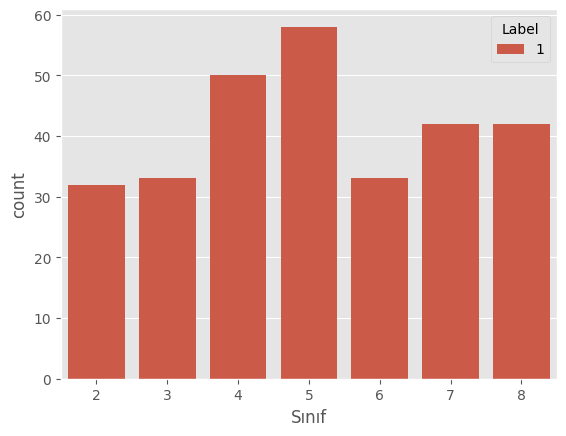

In [27]:
# Shows the Distribution of GTS with respect to Class

# Subset your data to only include Label=1
df_label_1 = df[df["Label"] == 1]

sns.countplot(x="Sınıf", hue="Label", data=df_label_1)


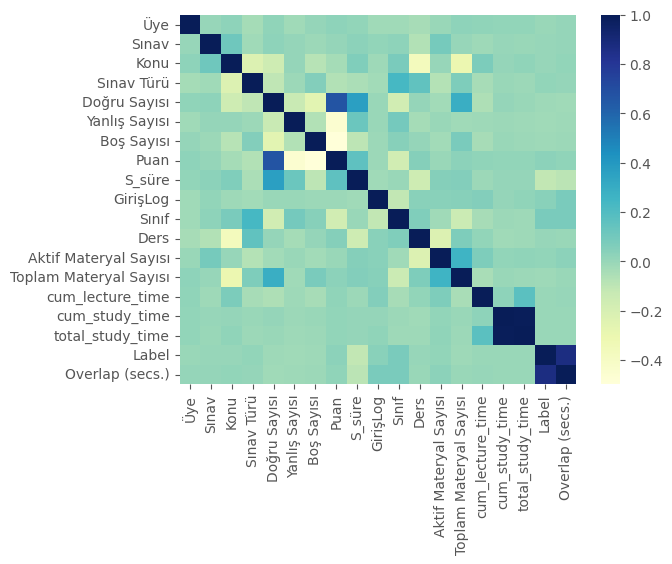

In [28]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap plot of the correlation matrix using Seaborn
sns.heatmap(corr, cmap="YlGnBu")

# Show the plot
plt.show()

In [29]:
# we need to drop the columns that are highly correlated with each other to avoid multicollinearity

df.drop(["Doğru Sayısı","Yanlış Sayısı","Boş Sayısı","S_Giriş Zamanı","S_Çıkış Zamanı","Puan","cum_lecture_time","cum_study_time","Overlap (secs.)"], axis=1, inplace=True)

In [30]:
df.head()

,Üye,Sınav,Konu,Sınav Türü,S_süre,GirişLog,Sınıf,Ders,Aktif Materyal Sayısı,Toplam Materyal Sayısı,total_study_time,Label
0,2910824,268222943622,8964,1,237,128004,6,2,6,6,3102,0
1,2910824,501151045356,9535,1,241,182887,6,9,6,6,3245,0
2,2910824,934072969211,9659,1,149,238434,6,3,6,6,0,0
3,2910824,934072969211,9659,1,659,273943,6,3,6,6,3365,0
4,2910824,438484723,4421,1,115,285795,6,11,5,7,3572,0


In [31]:
# to remove the columns which has single value, we investigate the unique values of each column

print(df['Sınav Türü'].unique())
print(df['Sınıf'].unique())
print(df['Label'].unique())

[ 1  7 13 15  2 12 14  5  4]
[ 6  4  3  8  2  5  7  1 23 41]
[0 1]


we have different values on the columns so no need any extraction for unique values.

In [32]:
df.dtypes

Üye                       int64
Sınav                     int64
Konu                      int64
Sınav Türü                int64
S_süre                    int64
GirişLog                  int64
Sınıf                     int64
Ders                      int64
Aktif Materyal Sayısı     int64
Toplam Materyal Sayısı    int64
total_study_time          int64
Label                     int64
dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7878 entries, 0 to 7877
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Üye                     7878 non-null   int64
 1   Sınav                   7878 non-null   int64
 2   Konu                    7878 non-null   int64
 3   Sınav Türü              7878 non-null   int64
 4   S_süre                  7878 non-null   int64
 5   GirişLog                7878 non-null   int64
 6   Sınıf                   7878 non-null   int64
 7   Ders                    7878 non-null   int64
 8   Aktif Materyal Sayısı   7878 non-null   int64
 9   Toplam Materyal Sayısı  7878 non-null   int64
 10  total_study_time        7878 non-null   int64
 11  Label                   7878 non-null   int64
dtypes: int64(12)
memory usage: 738.7 KB


We have no null values so no need to deal with missing data. Since we are planning to use xgboost, we need only int, float and bool values. Our data is already in this format so no need to convert any data type. 

### Format the data 1 - Split data into train and test

In [34]:
# since we try to predict the Label column, we need to drop this column before assigning the data to X

X = df.drop('Label', axis=1).copy()
X.head()

,Üye,Sınav,Konu,Sınav Türü,S_süre,GirişLog,Sınıf,Ders,Aktif Materyal Sayısı,Toplam Materyal Sayısı,total_study_time
0,2910824,268222943622,8964,1,237,128004,6,2,6,6,3102
1,2910824,501151045356,9535,1,241,182887,6,9,6,6,3245
2,2910824,934072969211,9659,1,149,238434,6,3,6,6,0
3,2910824,934072969211,9659,1,659,273943,6,3,6,6,3365
4,2910824,438484723,4421,1,115,285795,6,11,5,7,3572


In [35]:
# y is the Label column which we want to predict

y = df['Label'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [36]:
### Format the data 2 : One Hot Encoding 

# One Hot Encoding is not good for logistic regression but great for tree based models for categorical variables

X_encoded = pd.get_dummies(X, columns=['Üye', 'Sınav','Konu','Sınav Türü','GirişLog','Sınıf','Ders','Aktif Materyal Sayısı', 'Toplam Materyal Sayısı'])

print(X_encoded.info())

X_encoded.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7878 entries, 0 to 7877
Columns: 7025 entries, S_süre to Toplam Materyal Sayısı_71
dtypes: int64(2), uint8(7023)
memory usage: 52.9 MB
None


,S_süre,total_study_time,Üye_2910824,Üye_3045726,Üye_6789503,Üye_7899454,Üye_14504673,Üye_14609912,Üye_15894206,Üye_16053230,Üye_16226782,Üye_18960120,Üye_21361443,Üye_22316002,Üye_24621304,Üye_33723446,Üye_35310187,Üye_35764766,Üye_37227361,Üye_37907180,Üye_38651307,Üye_38849585,Üye_39387378,Üye_45173778,Üye_45184721,Üye_45235292,Üye_50605810,Üye_51747845,Üye_51981886,Üye_56334050,Üye_58617839,Üye_62154816,Üye_63207397,Üye_63604000,Üye_64302772,Üye_65887045,Üye_66038990,Üye_66428283,Üye_68884693,Üye_75605163,Üye_75917389,Üye_76645078,Üye_77081635,Üye_77595586,Üye_79707406,Üye_80650091,Üye_82183607,Üye_82796231,Üye_84846910,Üye_84980322,Üye_87863511,Üye_91753412,Üye_93793614,Üye_94463049,Üye_94938582,Üye_102310839,Üye_108204947,Üye_109977766,Üye_112481906,Üye_117370977,Üye_117697080,Üye_118785097,Üye_120792843,Üye_130128374,Üye_130979277,Üye_133954200,Üye_135565668,Üye_136175498,Üye_136230772,Üye_136397851,Üye_138249740,Üye_141956450,Üye_142881812,Üye_145721182,Üye_149336716,Üye_149719769,Üye_150084615,Üye_151204810,Üye_151561320,Üye_152895253,Üye_153217258,Üye_154292330,Üye_154687304,Üye_155505564,Üye_158585262,Üye_159274347,Üye_161567683,Üye_165144241,Üye_165197885,Üye_165542428,Üye_166821879,Üye_167010472,Üye_172404553,Üye_179088329,Üye_179695970,Üye_180031014,Üye_180432134,Üye_183332273,Üye_186601169,Üye_192121909,Üye_193907674,Üye_199347762,Üye_199998337,Üye_200095800,Üye_201708711,Üye_206254497,Üye_209369678,Üye_209638411,Üye_211045779,Üye_211606948,Üye_213325936,Üye_215275986,Üye_218400061,Üye_220244266,Üye_222366192,Üye_224506231,Üye_225618370,Üye_226454372,Üye_227717292,Üye_228928617,Üye_231875042,Üye_233340478,Üye_238298094,Üye_240745005,Üye_242112699,Üye_243148981,Üye_248155073,Üye_250393088,Üye_252644700,Üye_253361725,Üye_254352746,Üye_254720432,Üye_256149593,Üye_256701541,Üye_257108390,Üye_259585894,Üye_263755751,Üye_267588190,Üye_269026665,Üye_270018616,Üye_270758738,Üye_271850621,Üye_272962387,Üye_276708213,Üye_280438579,Üye_282603905,Üye_288656663,Üye_295407169,Üye_295848243,Üye_299361099,Üye_300428814,Üye_305527386,Üye_307428634,Üye_314210898,Üye_314776723,Üye_317096275,Üye_318678639,Üye_322342602,Üye_324485063,Üye_324523247,Üye_324821829,Üye_325935039,Üye_326541935,Üye_328565653,Üye_329075785,Üye_329594531,Üye_333575935,Üye_334120340,Üye_336002916,Üye_337916458,Üye_338032594,Üye_338202886,Üye_338537789,Üye_338804287,Üye_339165082,Üye_341804450,Üye_342808323,Üye_345241589,Üye_345697658,Üye_347751690,Üye_348861873,Üye_354005428,Üye_354194906,Üye_358096775,Üye_363050945,Üye_364079545,Üye_367562272,Üye_370318847,Üye_370566393,Üye_371780372,Üye_371832526,Üye_374277480,Üye_375493182,Üye_375824175,Üye_375851649,Üye_375939007,Üye_377095150,Üye_377522628,Üye_378487804,Üye_378541448,Üye_379080311,Üye_384048358,Üye_384610738,Üye_387225565,Üye_387617513,Üye_388860549,Üye_388886347,Üye_393392458,Üye_398247629,Üye_400653608,Üye_407792708,Üye_412616260,Üye_415548250,Üye_416025273,Üye_416184483,Üye_420557322,Üye_420963006,Üye_421418609,Üye_426185444,Üye_432295433,Üye_435848661,Üye_436530902,Üye_437939434,Üye_439077836,Üye_439128872,Üye_441578484,Üye_450148049,Üye_451238534,Üye_454715301,Üye_458552257,Üye_462572917,Üye_462748378,Üye_468414824,Üye_476768089,Üye_481597323,Üye_482889207,Üye_484529313,Üye_485425385,Üye_489489956,Üye_491543848,Üye_492058776,Üye_493234757,Üye_493252546,Üye_493614644,Üye_497856213,Üye_498088485,Üye_498661528,Üye_499216503,Üye_503960520,Üye_506072946,Üye_507084316,Üye_507865323,Üye_513765066,Üye_515211689,Üye_515648060,Üye_516119170,Üye_519696147,Üye_519767952,Üye_520949568,Üye_523112704,Üye_525203337,Üye_528379520,Üye_533521165,Üye_538953896,Üye_540338447,Üye_541534265,Üye_542172733,Üye_544323297,Üye_546933794,Üye_547395404,Üye_551767545,Üye_551910456,Üye_553332958,Üye_553982835,Üye_561625781,Üye_562729584,Üye_562917944,Üye_565954289,Üye_566060692,Üye_567165567,Üye_568381129,Üye_571483458,Üye_572939907,Üye_573824523,Üye_578967939,Üye_580752446,Üye_587334801,Üye_587733920,Üye_589004896,Üye_592948115,

In [37]:
# verify that y has only 0 and 1 values

y.unique()

array([0, 1], dtype=int64)

### Build a preliminary XGBoost Model

In [38]:
# check the target data imbalance

sum(y)/len(y)

0.036811373445036814

Our target variable is highly imbalanced. Thus, we use stratified sampling to split the data into train and test sets.

In [39]:
# split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)   #test_size=0.2 could be added to split in %80 train and %20 test 

In [40]:
# check if stratification is done correctly

print('y_train ratio:', sum(y_train)/len(y_train))
print('y_test ratio:',sum(y_test)/len(y_test))

y_train ratio: 0.03672985781990521
y_test ratio: 0.03705583756345178


In [41]:
len(y_test)/(len(y_test)+len(y_train))

0.2500634678852501

It seems stratified sampling is working well. 


Now we use XGB Classifier and Instead of determinin the optimal number of trees, we use early stopping to determine the optimal number of trees. Early Stopping is a method that allows you to specify a performance metric to evaluate your model on every step of the training process, and stop the training process when the performance metric no longer improves for a given number of steps.

In [42]:
# Create XGBClassifier model

clf_xgb = xgb.XGBClassifier(objective='binary:logistic', tree_method='gpu_hist', seed=42)
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test, y_test)]) 

c:\Users\melih\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\melih\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.14401
[1]	validation_0-aucpr:0.16702
[2]	validation_0-aucpr:0.21395
[3]	validation_0-aucpr:0.24434
[4]	validation_0-aucpr:0.23324
[5]	validation_0-aucpr:0.23392
[6]	validation_0-aucpr:0.23648
[7]	validation_0-aucpr:0.24828
[8]	validation_0-aucpr:0.26043
[9]	validation_0-aucpr:0.26499
[10]	validation_0-aucpr:0.27242
[11]	validation_0-aucpr:0.27295
[12]	validation_0-aucpr:0.27431
[13]	validation_0-aucpr:0.27783
[14]	validation_0-aucpr:0.27814
[15]	validation_0-aucpr:0.27278
[16]	validation_0-aucpr:0.27819
[17]	validation_0-aucpr:0.27484
[18]	validation_0-aucpr:0.28569
[19]	validation_0-aucpr:0.28060
[20]	validation_0-aucpr:0.27881
[21]	validation_0-aucpr:0.28711
[22]	validation_0-aucpr:0.28294
[23]	validation_0-aucpr:0.28170
[24]	validation_0-aucpr:0.27426
[25]	validation_0-aucpr:0.27118
[26]	validation_0-aucpr:0.27323
[27]	validation_0-aucpr:0.26939
[28]	validation_0-aucpr:0.27065
[29]	validation_0-aucpr:0.27094
[30]	validation_0-aucpr:0.27112
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

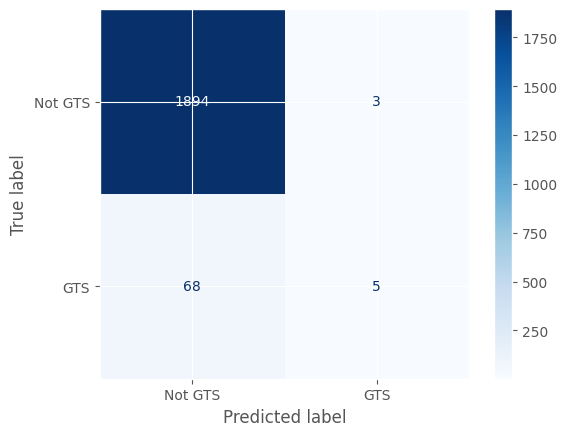

In [43]:
ConfusionMatrixDisplay.from_estimator(clf_xgb, X_test, y_test, cmap='Blues', values_format='d' ,display_labels=['Not GTS', 'GTS'])

Our default XGBoost model is not performing well. We need to tune the hyperparameters to improve the performance.


### Optimize the hyperparameters using cross validation and GridSearchCV

In [44]:
# first try

param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
    #'n_estimators': [100, 200],
    #'gamma': [0.0, 0.25, 0.5, 1.0],
    #'subsample': [0.5, 0.9],
    #'colsample_bytree': [0.3, 0.5, 0.9],
    #'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
    #'reg_lambda': [10, 20, 100],
    'scale_pos_weight': [1, 3, 5]
}

In [45]:
optimal_params = GridSearchCV(
    estimator=clf_xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=4,
    cv=5
)


optimal_params.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, scale_pos_weight=1;, score=0.744 total time=  13.7s
[CV 2/5] END learning_rate=0.01, max_depth=3, scale_pos_weight=1;, score=0.767 total time=  13.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, scale_pos_weight=1;, score=0.837 total time=  13.7s
[CV 4/5] END learning_rate=0.01, max_depth=3, scale_pos_weight=1;, score=0.792 total time=  13.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, scale_pos_weight=1;, score=0.754 total time=  12.8s
[CV 1/5] END learning_rate=0.01, max_depth=3, scale_pos_weight=3;, score=0.757 total time=  12.9s
[CV 2/5] END learning_rate=0.01, max_depth=3, scale_pos_weight=3;, score=0.772 total time=  13.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, scale_pos_weight=3;, score=0.808 total time=  13.7s
[CV 4/5] END learning_rate=0.01, max_depth=3, scale_pos_weight=3;, score=0.795 total time=  13.3s
[CV 5/5] END learning_rate=0.01, max_depth=3, scale_pos_

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 9],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc', verbose=4)

In [48]:
optimal_params.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'scale_pos_weight': 5}

In [49]:
optimal_params.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
optimal_params.best_score_

0.818845653446737

In [55]:
resultsdf = pd.DataFrame(optimal_params.cv_results_)
resultsdf = resultsdf.sort_values(by=['rank_test_score'], ascending=False)
resultsdf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_scale_pos_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,13,0,0,0,,3,5,"{'learning_rate': 0.01, 'max_depth': 3, 'scale...",1,1,1,1,1,1,0,27
0,13,0,0,0,,3,1,"{'learning_rate': 0.01, 'max_depth': 3, 'scale...",1,1,1,1,1,1,0,26
1,13,0,0,0,,3,3,"{'learning_rate': 0.01, 'max_depth': 3, 'scale...",1,1,1,1,1,1,0,25
8,29,2,0,0,,9,5,"{'learning_rate': 0.01, 'max_depth': 9, 'scale...",1,1,1,1,1,1,0,24
4,18,1,0,0,,6,3,"{'learning_rate': 0.01, 'max_depth': 6, 'scale...",1,1,1,1,1,1,0,23


In [ ]:
# buraya tree çizdir.
